In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
diabetes = load_diabetes()

In [3]:
X = diabetes.data
y = diabetes.target

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [5]:
ransac = RANSACRegressor(LinearRegression(),
                        max_trials=100,
                        min_samples=50,
                        loss='absolute_loss',
                        random_state=2021)

In [6]:
ransac.fit(x_train, y_train)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=50,
                random_state=2021)

In [7]:
ransac_pred = ransac.predict(x_test)

In [8]:
print("R2 = {:.2}".format(r2_score(y_test, ransac_pred)))

R2 = 0.49


In [9]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['Value'] = diabetes.target

In [10]:
X_ = df['bmi'].values
y_ = df['Value'].values

In [11]:
X_ = X_[:, np.newaxis]
y_ = y_[:, np.newaxis]

In [12]:
ransac2 = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         loss='absolute_loss',
                         random_state=2021)

In [13]:
ransac2.fit(X_, y_)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=50,
                random_state=2021)

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X_, y_)

LinearRegression()

In [17]:
x_values = np.arange(-0.1,0.1, 0.0001)

In [18]:
y_ransac = ransac2.predict(x_values[:,np.newaxis])

In [19]:
y_lr = lr.predict(x_values[:,np.newaxis])

In [20]:
inlier_mask = ransac2.inlier_mask_

In [21]:
outlier_mask = np.logical_not(inlier_mask)

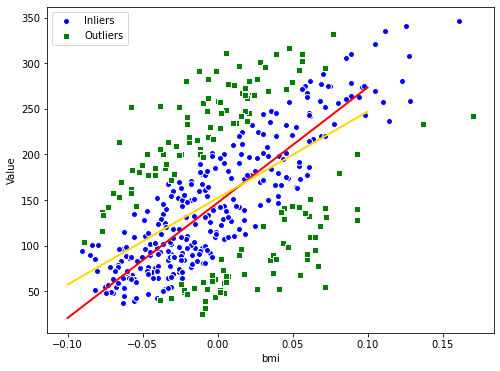

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(X_[inlier_mask], y_[inlier_mask], c='blue', edgecolor='white', marker='o', label='Inliers')
plt.scatter(X_[outlier_mask], y_[outlier_mask], c='green', edgecolor='white', marker='s', label='Outliers')
plt.plot(x_values, y_ransac, color='red', lw=2)
plt.plot(x_values, y_lr, color='gold', lw=2)
plt.xlabel('bmi')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

In [23]:
print('Slope: %.3f' % ransac2.estimator_.coef_[0])

Slope: 1265.157


In [24]:
print('Intercept: %.3f' % ransac2.estimator_.intercept_)

Intercept: 147.102


In [25]:
y_ransac_pred = ransac2.predict(X_[inlier_mask])

In [26]:
print("R2 = {:.2}".format(r2_score(y_[inlier_mask],y_ransac_pred)))

R2 = 0.78
